<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
# from src import soporte_nulos as sn

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Estandarización

En el laboratorio de ayer, decidimos que las columnas numericas eran "price", "powerCV", y "kilometer". Y los nulos los tratamos con IterativeImputer, generando un csv que ahora cargaremos como DataFrame para trabajar sobre él.

yearOfRegistration y monthOfRegistration decidimos tratarlas como categóricas así que quedan fuera de la estandarización

In [4]:
df = pd.read_csv("datos/iterative.csv",index_col=0)

In [5]:
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,Clásico,manually,84.646901,golf,150000.0,NaN,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,187.000000,NaN,125000.0,5.0,diesel,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50


In [6]:
# Guardamos en un nuevo dataframe las columnas a estandarizar
df_estandarizacion = df[['price', 'powerCV', 'kilometer']]
df_estandarizacion.head()


,price,powerCV,kilometer
0,480.0,84.646901,150000.0
1,18300.0,187.000000,125000.0
2,9800.0,161.000000,125000.0
3,1500.0,74.000000,150000.0
4,3600.0,68.000000,90000.0


In [7]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df_estandarizacion[["price", "powerCV","kilometer"]])
df_estandarizacion[["price_robust", "powerCV_robust","kilometer_robust"]] = datos_transf_robust


escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df_estandarizacion[["price", "powerCV","kilometer"]])
df_estandarizacion[["price_min_max", "powerCV_min_max","kilometer_min_max"]] = datos_transf_min_max


escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df_estandarizacion[["price", "powerCV","kilometer"]])
df_estandarizacion[["price_norm", "powerCV_norm","kilometer_norm"]] = datos_transf_norm


escalador_standar = StandardScaler()
datos_transf_standar = escalador_standar.fit_transform(df[["price", "powerCV","kilometer"]])
df_estandarizacion[["price_standar", "powerCV_standar","kilometer_standar"]] = datos_transf_standar



In [8]:
df_estandarizacion.head(2)

,price,powerCV,kilometer,price_robust,powerCV_robust,kilometer_robust,price_min_max,powerCV_min_max,kilometer_min_max,price_norm,powerCV_norm,kilometer_norm,price_standar,powerCV_standar,kilometer_standar
0,480.0,84.646901,150000.0,-0.416529,-0.374913,0.0,0.000479,0.083899,1.000000,0.003200,0.000564,0.999995,-0.451658,-0.624214,0.607827
1,18300.0,187.000000,125000.0,2.528926,1.128683,-1.0,0.018299,0.186560,0.827586,0.144856,0.001480,0.989452,1.026809,1.074628,-0.015424


In [9]:
df_estandarizacion.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,5.923848e+03,12053.036525,1.000000,1250.000000,3000.000000,7300.000000,999999.000000
powerCV,371528.0,1.222550e+02,60.248808,1.000000,79.927782,110.168074,148.000000,998.000000
kilometer,371528.0,1.256187e+05,40112.337051,5000.000000,125000.000000,150000.000000,150000.000000,150000.000000
price_robust,371528.0,4.832806e-01,1.992237,-0.495702,-0.289256,0.000000,0.710744,164.793223
powerCV_robust,371528.0,1.775607e-01,0.885072,-1.603710,-0.444238,0.000000,0.555762,13.042500
kilometer_robust,371528.0,-9.752525e-01,1.604493,-5.800000,-1.000000,0.000000,0.000000,0.000000
price_min_max,371528.0,5.922860e-03,0.012053,0.000000,0.001249,0.002999,0.007299,1.000000
powerCV_min_max,371528.0,1.216199e-01,0.060430,0.000000,0.079165,0.109497,0.147442,1.000000
kilometer_min_max,371528.0,8.318530e-01,0.276637,0.000000,0.827586,1.000000,1.000000,1.000000
price_norm,371528.0,7.496528e-02,0.146146,0.000007,0.009333,0.023327,0.065857,0.999987


El describe solo nos permite ver que los metodos han escalado bien de acuerdo a sus características, pero no podemos hacer comparaciones numéricas, precisamente porque cada uno de ellos sigue una escala distinta

Sacamos graficas para ver como quedan las distribuciones de las columnas que hemos añadido con cada metodo


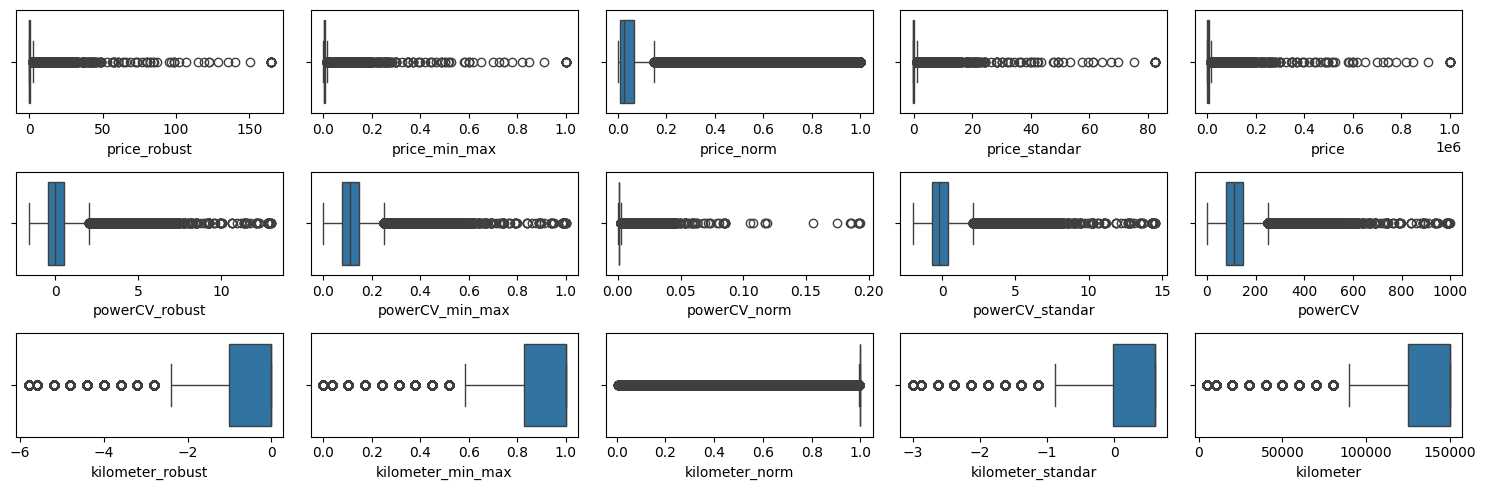

In [10]:
fig , axes = plt.subplots(nrows=3 , ncols=5, figsize = (15, 5) )

sns.boxplot(x = "price_robust", data = df_estandarizacion, ax = axes[0][0])
sns.boxplot(x = "price_min_max", data = df_estandarizacion, ax = axes[0][1])
sns.boxplot(x = "price_norm", data = df_estandarizacion, ax = axes[0][2])
sns.boxplot(x = "price_standar", data = df_estandarizacion, ax = axes[0][3])
sns.boxplot(x = "price", data = df_estandarizacion, ax = axes[0][4])


sns.boxplot(x = "powerCV_robust", data = df_estandarizacion, ax = axes[1][0])
sns.boxplot(x = "powerCV_min_max", data = df_estandarizacion, ax = axes[1][1])
sns.boxplot(x = "powerCV_norm", data = df_estandarizacion, ax = axes[1][2])
sns.boxplot(x = "powerCV_standar", data = df_estandarizacion, ax = axes[1][3])
sns.boxplot(x = "powerCV", data = df_estandarizacion, ax = axes[1][4])

sns.boxplot(x = "kilometer_robust", data = df_estandarizacion, ax = axes[2][0])
sns.boxplot(x = "kilometer_min_max", data = df_estandarizacion, ax = axes[2][1])
sns.boxplot(x = "kilometer_norm", data = df_estandarizacion, ax = axes[2][2])
sns.boxplot(x = "kilometer_standar", data = df_estandarizacion, ax = axes[2][3])
sns.boxplot(x = "kilometer", data = df_estandarizacion, ax = axes[2][4])


plt.tight_layout()

Las graficas del metodo Normalize son las que más se aleján en su distribución de la original.

Las otra, salvo las difernias de escalas, siguen distribuciones muy muy similares. Se observa una ligera diferencia en la separacion del bigote de la izquierda con respecto a la caja para price_robust en comparacion con la columna original price y price_min_max y price_standar. Entre min_max y standarscaler creo no se aprecian diferencias en las graficas, pero dado que las tres columnas no siguen una distribucion normal, parece mas adecuado emplear min_max que standar_scaler.

Por criterios de similitud, en las tres variables nos quedaríamos con el min_max pues con el metodo min_max, pero hay que hacer notar, que el robust, aunque se descartó al analizar las gráficas, es desde el punto de vista teórico el método que mejor trata con los outliers, mientras que min_max es sensible a estos. Así que habría que dejar abierta, de cara al futuro la elección del método. según el interés que tengamos en emplear los outliers.

Finalmente, como en sucesivos días vamos a hacer gestión de outliers, y teniendo en cuenta que en las variables predictoras no hay ninguna diferencia apreciable en las gráficas elegimos el RobustScaler. Price es la Variable Respuesta así que en vez de la versión procesada nos quedamos con la original, y de las otras dos variables cogemos las obtenidas con RobustScaler.

In [11]:
df_robust = df_estandarizacion[["price", "powerCV_robust","kilometer_robust"]]

In [12]:
df_robust.head()

,price,powerCV_robust,kilometer_robust
0,480.0,-0.374913,0.0
1,18300.0,1.128683,-1.0
2,9800.0,0.746735,-1.0
3,1500.0,-0.531319,0.0
4,3600.0,-0.619461,-2.4


In [13]:
df_robust.to_csv("datos/robust.csv")